## [DESCRIPTION](https://developers.google.com/earth-engine/datasets/catalog/GLOBAL_FLOOD_DB_MODIS_EVENTS_V1)
[The Global Flood Database](https://global-flood-database.cloudtostreet.info/) contains maps of the extent and temporal distribution of 913 flood events occurring between 2000-2018. For more information, [see the associated journal article.](https://www.nature.com/articles/s41586-021-03695-w)

Flood events were collected from the [Dartmouth Flood Observatory](https://floodobservatory.colorado.edu/) and used to collect MODIS imagery. The selected 913 events are those that were successfully mapped (passed quality control as having significant inundation beyond permanent water) using 12,719 scenes from Terra and Aqua MODIS sensors. Each pixel was classified as water or non-water at 250-meter resolution during the full date range of each flood event and subsequent data products were generated including maximum flood extent ("flooded" band) and the duration of inundation in days ("duration" band). Water and non-water classifications during a flood event include permanent water (here resampling the 30-meter [JRC Global Surface Water dataset](https://global-surface-water.appspot.com/) representing permanent water to 250-meter resolution), which can be masked out to isolate flood water using the "jrc_perm_water" band. Extra data quality bands were added representing cloud conditions during the flood event (e.g., "clear_views" representing the number of clear days the flood was observed between its start and end dates and "clear_perc" representing the percentage of clear day observation of the total event duration in days).

Each image in the ImageCollection represents the map of an individual flood. The collection can be filtered by date, country, or Dartmouth Flood Observatory original ID.

##Terms of Use

This work is licensed under the Creative Commons Attribution Non Commercial 4.0 International license.

## Citations:
Tellman, B., J.A. Sullivan, C. Kuhn, A.J. Kettner, C.S. Doyle, G.R. Brakenridge, T. Erickson, D.A. Slayback. (Accepted.) Satellites observe increasing proportion of population exposed to floods. Nature. doi:[10.1038/s41586-021-03695-w](https://www.nature.com/articles/s41586-021-03695-w)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gfd.csv')

## DATA PREPROCESSING

In [ ]:
df.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/2000,3/1/2000,...,Heavy rain,2.0,316.73,38,38,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/2000,3/11/2000,...,"Tropical Storm, Surge",1.0,228.50,4594,4594,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/2000,4/25/2000,...,"Snowmelt, Ice, Rain",2.0,89.10,3093,3093,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/2000,8/10/2000,...,Heavy rain,1.0,4322.47,544758,544758,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/2000,9/10/2000,...,"Tropical Storm, Surge",1.0,740.33,785363,785363,766309,1,0,19054,1.0


In [ ]:
df.columns

Index(['system:index', 'index', 'threshold_type', 'glide_index', 'dfo_country',
       'dfo_other_country', 'dfo_centroid_x', 'dfo_centroid_y', 'dfo_began',
       'dfo_ended', 'dfo_validation', 'dfo_dead', 'dfo_displaced', 'dfo_cause',
       'dfo_severity', 'gfd_area', 'gfd_exp_ghsl_ts', 'gfd_exp_ghsl_2000',
       'gfd_exp_ghsl_2015', 'Errors', 'dif 2000', 'dif 2015', 'error 2000'],
      dtype='object')

## Column Descriptions

- **`system:index` / `index`**: Unique identifier for each flood event.
- **`threshold_type`**: Method used to classify water/non-water in the water detection algorithm (e.g., "otsu" or "std").
- **`glide_index`**: Identifier linked to GLIDE numbers, which are used for disaster event tracking. In this dataset, it appears to be unused (`0`).
- **`dfo_country`**: Primary country affected by the flood event.
- **`dfo_other_country`**: Secondary country impacted by the flood, if applicable.
- **`dfo_centroid_x`**: Longitude of the event centroid, representing the approximate location of the flood.
- **`dfo_centroid_y`**: Latitude of the event centroid, representing the approximate location of the flood.
- **`dfo_began`**: Start date of the flood event.
- **`dfo_ended`**: End date of the flood event.
- **`dfo_validation`**: Validation type or source of flood confirmation (e.g., "News", "FloodList",...).
- **`dfo_dead`**: Number of fatalities caused by the flood.
- **`dfo_displaced`**: Estimated number of people displaced or evacuated due to the flood.
- **`dfo_cause`**: Main cause of the flood event (e.g., "Heavy rain," "Snowmelt, Ice, Rain", "Dam",...).
- **`dfo_severity`**: Severity of the flood event (e.g., `1` for significant damage, `2` for extreme events).
- **`gfd_area`**: Total flood-affected area (in square kilometers).
- **`gfd_exp_ghsl_ts`**: Total exposure of the population or infrastructure over time, derived from the Global Human Settlement Layer (GHSL).
- **`gfd_exp_ghsl_2000`**: Exposure data based on GHSL for the year 2000.
- **`gfd_exp_ghsl_2015`**: Exposure data based on GHSL for the year 2015.
- **`Errors`**: Binary indicator for errors or anomalies in the data (e.g., `1` for errors, `0` for none).
- **`dif 2000`**: Difference in exposure estimates between observed and modeled data for 2000.
- **`dif 2015`**: Difference in exposure estimates between observed and modeled data for 2015.
- **`error 2000`**: Error margin for the exposure estimate in 2000.


In [ ]:
df.describe()

,index,dfo_centroid_x,dfo_centroid_y,dfo_dead,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
count,913.000000,913.000000,913.000000,913.000000,9.130000e+02,913.000000,913.000000,9.130000e+02,9.130000e+02,9.130000e+02,913.000000,9.130000e+02,9.130000e+02,24.0
mean,3238.526835,38.340958,15.395235,180.046002,2.674868e+05,1.297371,6889.022716,9.773338e+05,7.239927e+05,1.316456e+06,0.814896,2.533411e+05,-3.391224e+05,1.0
std,796.705451,78.687132,24.050427,3332.691202,1.995806e+06,0.392520,12081.199078,3.030580e+06,2.353548e+06,4.404256e+06,0.388595,1.234033e+06,1.992346e+06,0.0
min,1586.000000,-156.215507,-45.953281,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.402880e+05,-2.757563e+07,1.0
25%,2596.000000,-13.967824,0.058024,0.000000,3.000000e+01,1.000000,608.600000,1.260000e+04,9.705000e+03,1.471000e+04,1.000000,0.000000e+00,-1.965700e+04,1.0
50%,3226.000000,55.552555,18.877688,5.000000,3.500000e+03,1.000000,2104.940000,6.914600e+04,5.948800e+04,8.318800e+04,1.000000,1.000000e+00,0.000000e+00,1.0
75%,3900.000000,103.415798,32.886368,27.000000,4.000000e+04,1.500000,7354.550000,3.847980e+05,3.305560e+05,4.926700e+05,1.000000,1.631500e+04,0.000000e+00,1.0
max,4711.000000,178.075692,68.000870,100000.000000,4.000000e+07,2.000000,98547.620000,2.771299e+07,2.771300e+07,5.528862e+07,1.000000,1.366695e+07,4.587060e+06,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       913 non-null    object 
 1   index              913 non-null    int64  
 2   threshold_type     913 non-null    object 
 3   glide_index        681 non-null    object 
 4   dfo_country        913 non-null    object 
 5   dfo_other_country  638 non-null    object 
 6   dfo_centroid_x     913 non-null    float64
 7   dfo_centroid_y     913 non-null    float64
 8   dfo_began          913 non-null    object 
 9   dfo_ended          913 non-null    object 
 10  dfo_validation     913 non-null    object 
 11  dfo_dead           913 non-null    int64  
 12  dfo_displaced      913 non-null    int64  
 13  dfo_cause          913 non-null    object 
 14  dfo_severity       913 non-null    float64
 15  gfd_area           913 non-null    float64
 16  gfd_exp_ghsl_ts    913 non

In [ ]:
df.isna().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,0


In [ ]:
# Check for duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
  print("Duplicate Rows:")
  print(duplicate_rows)
else:
  print("No duplicate rows found.")

# Check for duplicates based on specific columns (e.g., 'id')
duplicate_ids = df[df.duplicated(subset=['index'])]

if not duplicate_ids.empty:
    print("\nDuplicate IDs:")
    print(duplicate_ids)
else:
    print("\nNo duplicate IDs found.")

No duplicate rows found.

No duplicate IDs found.


## DATA VISUALIZING

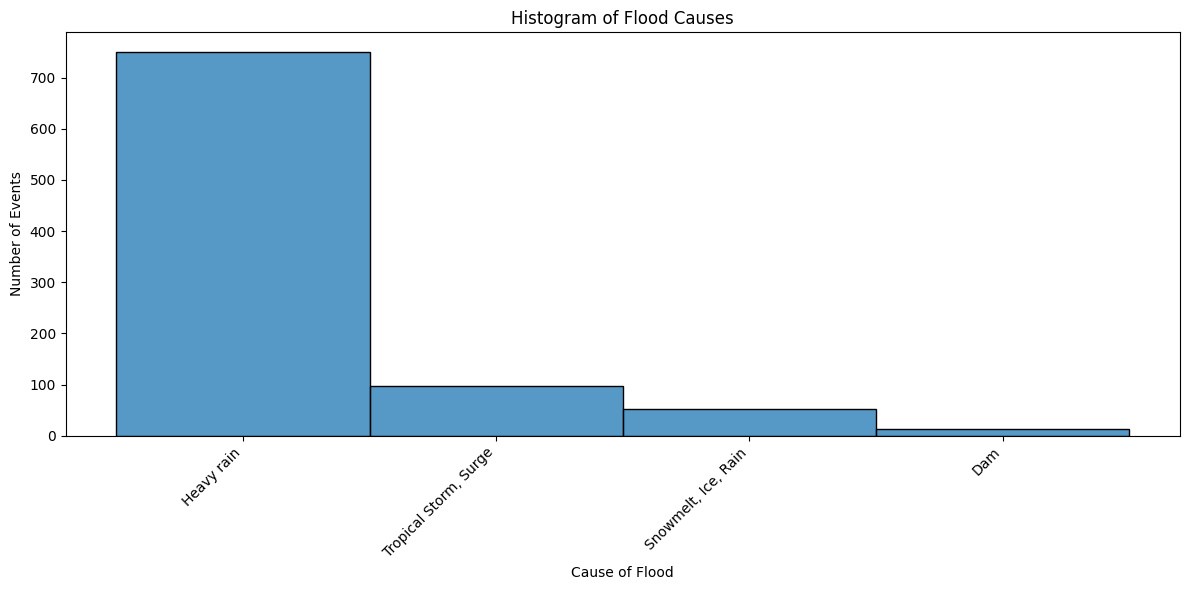

In [ ]:
# Histogram of Flood Causes
plt.figure(figsize=(12, 6))
sns.histplot(df['dfo_cause'], kde=False)
plt.title('Histogram of Flood Causes')
plt.xlabel('Cause of Flood')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

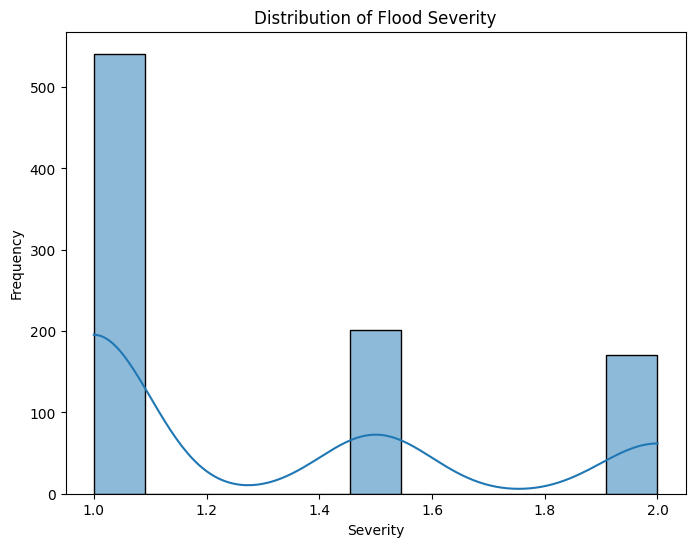

In [ ]:
# Distribution of flood severity
plt.figure(figsize=(8, 6))
sns.histplot(df['dfo_severity'], kde=True)
plt.title('Distribution of Flood Severity')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

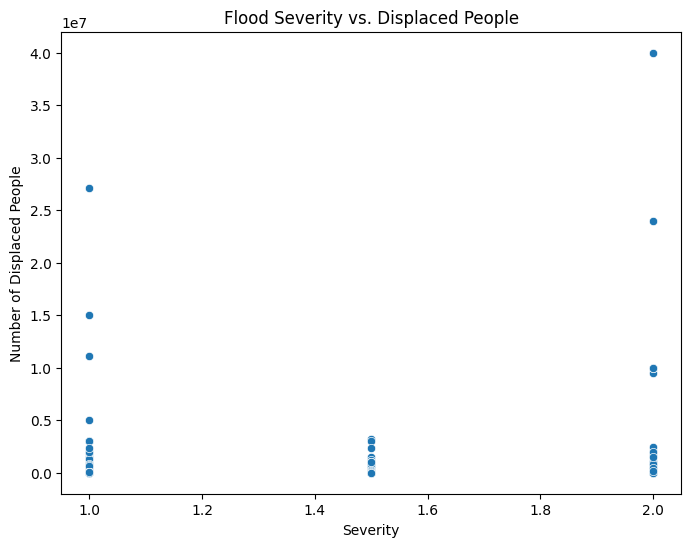

In [ ]:
# Relationship between flood severity and displaced people
plt.figure(figsize=(8, 6))
sns.scatterplot(x='dfo_severity', y='dfo_displaced', data=df)
plt.title('Flood Severity vs. Displaced People')
plt.xlabel('Severity')
plt.ylabel('Number of Displaced People')
plt.show()

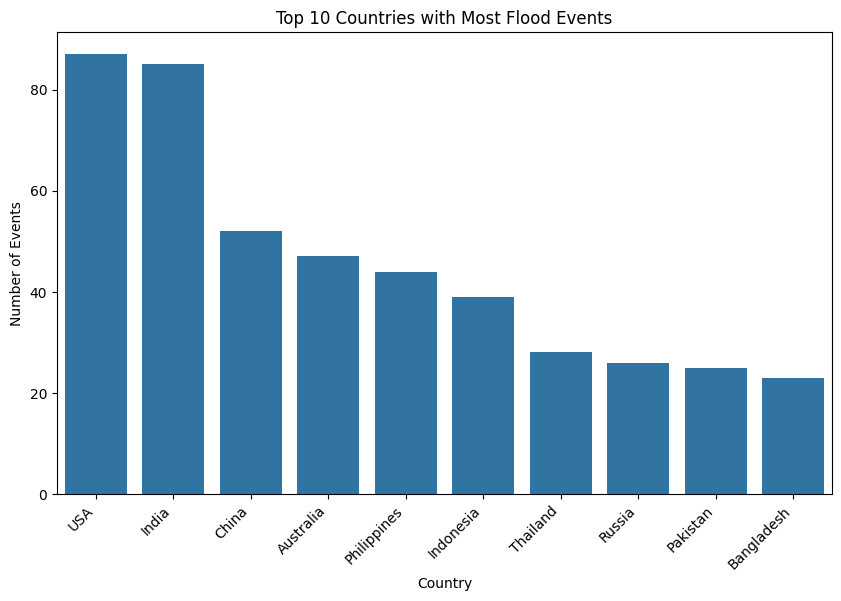

In [ ]:
# Top 10 countries with the most flood events
top_countries = df['dfo_country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Most Flood Events')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.show()

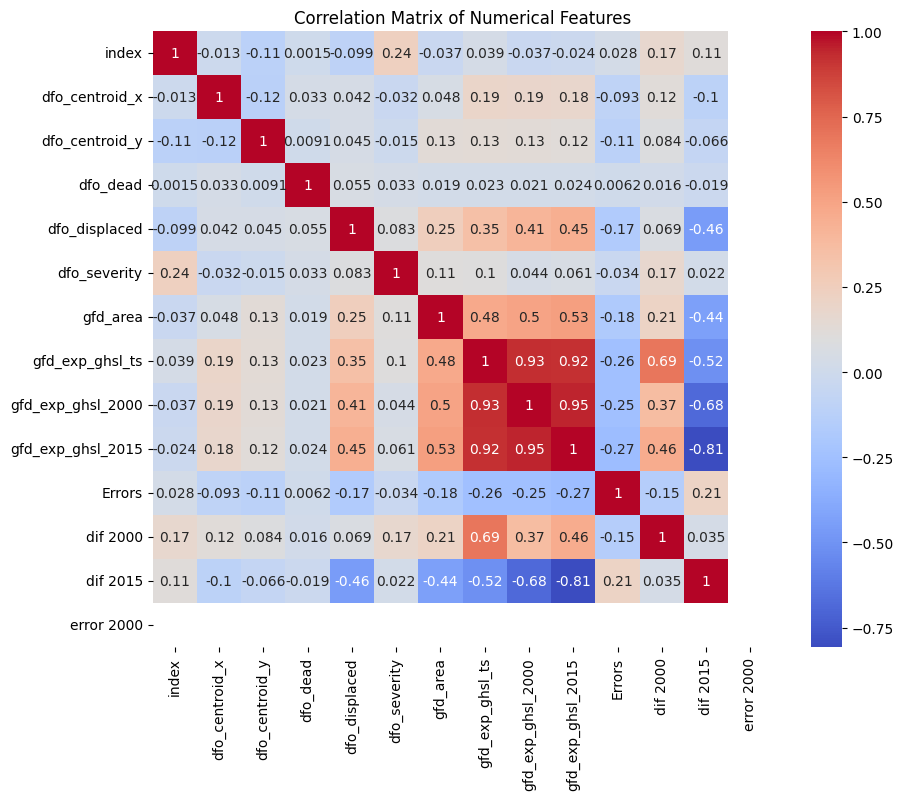

In [ ]:
# Correlation matrix of numerical features
numerical_cols = df.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

[For better understanding of the dataset...](https://global-flood-database.cloudtostreet.info/)

## FEATURE ENGINEERING

In [ ]:
print(df['dfo_cause'].unique())

['Heavy rain' 'Tropical Storm, Surge' 'Snowmelt, Ice, Rain' 'Dam']


Our focus is on heavy rain and tropical rain because we incorporate rainfall into our model, so floods caused by snowmelt or dam breaks are not considered.


In [ ]:
new_df = df[df['dfo_cause'].isin(['Heavy rain', 'Tropical Storm, Surge'])]

In [ ]:
print("Old dataframe length: ",len(df))
print("New dataframe length: ",len(new_df))

Old dataframe length:  913
New dataframe length:  848


In [ ]:
new_df.columns

Index(['system:index', 'index', 'threshold_type', 'glide_index', 'dfo_country',
       'dfo_other_country', 'dfo_centroid_x', 'dfo_centroid_y', 'dfo_began',
       'dfo_ended', 'dfo_validation', 'dfo_dead', 'dfo_displaced', 'dfo_cause',
       'dfo_severity', 'gfd_area', 'gfd_exp_ghsl_ts', 'gfd_exp_ghsl_2000',
       'gfd_exp_ghsl_2015', 'Errors', 'dif 2000', 'dif 2015', 'error 2000'],
      dtype='object')


We will first predict whether the location is likely to flood or not; risk and exposure predictions will be done in the future. We have selected the following features for modeling:
- **`system:index` / `index`**: Unique identifier for each flood event (incuded began day and end day).
- **`threshold_type`**: Method used to classify water/non-water in the water detection algorithm (e.g., "otsu" or "std").
- **`dfo_centroid_x`**: Longitude of the event centroid, representing the approximate location of the flood.
- **`dfo_centroid_y`**: Latitude of the event centroid, representing the approximate location of the flood.
- **`dfo_cause`**: Main cause of the flood event (e.g., "Heavy rain," "Snowmelt, Ice, Rain", "Dam",...).
- **`gfd_area`**: Total flood-affected area (in square kilometers).

In [ ]:
flood_prediction_df = new_df[['dfo_began', 'dfo_ended', 'threshold_type', 'dfo_centroid_x', 'dfo_centroid_y', 'dfo_cause', 'gfd_area']]
flood_prediction_df.head()

,dfo_began,dfo_ended,threshold_type,dfo_centroid_x,dfo_centroid_y,dfo_cause,gfd_area
0,2/18/2000,3/1/2000,otsu,143.697800,-31.268059,Heavy rain,316.73
1,2/17/2000,3/11/2000,otsu,47.295670,-15.782624,"Tropical Storm, Surge",228.50
3,7/11/2000,8/10/2000,otsu,105.063841,11.242567,Heavy rain,4322.47
4,8/30/2000,9/10/2000,otsu,132.057679,43.773883,"Tropical Storm, Surge",740.33
5,9/1/2000,9/6/2000,std,113.483009,25.229313,Heavy rain,102.25


In [ ]:
flood_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 0 to 912
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dfo_began       848 non-null    object 
 1   dfo_ended       848 non-null    object 
 2   threshold_type  848 non-null    object 
 3   dfo_centroid_x  848 non-null    float64
 4   dfo_centroid_y  848 non-null    float64
 5   dfo_cause       848 non-null    object 
 6   gfd_area        848 non-null    float64
dtypes: float64(3), object(4)
memory usage: 85.3+ KB


In [ ]:
flood_prediction_df.to_csv('/content/drive/MyDrive/Colab Notebooks/flood_data.csv', index=False)